## The Sparks Foundation
 ### By-Priya Singh
 ### Task 1: Prediction using supervised learning
 #### Predict the percentage of an student based on the number of study hours.
    

In [1]:
#Import important libraries
import numpy as np
import pandas as pd

In [2]:
#Loading the dataset
url = "http://bit.ly/w-data"
data=pd.read_csv(url)


In [3]:
#displaying data
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


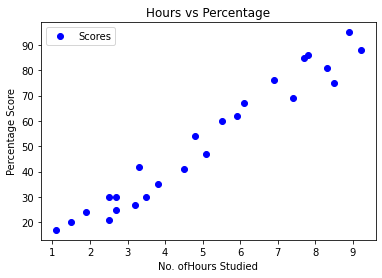

In [4]:
import matplotlib.pyplot as plt
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='bo')  
plt.title('Hours vs Percentage')  
plt.xlabel('No. ofHours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph,we can see that that there is a linear relation between the percentage scored by the student and the number of hour studied.So the next step is to prepare the data.

In [5]:
#Preparing the data.
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [6]:
#splitting the data into traing and testing.
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=1/3, random_state=0)


In [7]:
#Training the model.
#Simple linear regression
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)


LinearRegression()

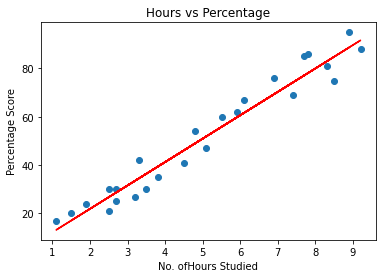

In [8]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.title('Hours vs Percentage')
plt.xlabel('No. ofHours Studied')  
plt.ylabel('Percentage Score')
plt.plot(X, line,color='r');
plt.show()

In [9]:
# Testing data - In Hours
print(xtest) 
# Predicting the scores
y_pred = regressor.predict(xtest) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]]


In [10]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


What will be the predicted score if the student studies for 9.25hrs/day?

In [11]:
# test with  hours=9.5 
hours = 9.25
arr=np.array([hours])

pred = regressor.predict(arr.reshape(1,-1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 92.14523314523314


In [12]:
#Evaluating the model.
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(ytest, y_pred)) 

Mean Absolute Error: 4.691397441397438
